# Data-Cleaning
![data-cleaning](assets/data-cleaning.png)

Data cleaning is a very important part of the process, if we have outliners or null values it can affect the performance by a lot.

### In this notebook we will be removing the outliers and null values and if we can fill some we will try to fill them

[Data](https://www.kaggle.com/samextensibleenergy/agricultural-commodity-dataset) being used in this notebook is from [Kaggle](https://www.kaggle.com/) with some added noise, [Agricultural_Commodity_Dataset](https://www.kaggle.com/samextensibleenergy/agricultural-commodity-dataset) by [Sam Paul](https://www.kaggle.com/samextensibleenergy)

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data
data = pd.read_csv('data/data_cmo_noisy.csv', parse_dates=['date'])
data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79.0,1406.0,1538.0,1463.0,2015-04-01,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106.0,1788.0,1925.0,1875.0,2016-04-01,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253.0,1572.0,1890.0,1731.0,2015-04-01,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387.0,1750.0,2220.0,1999.0,2016-04-01,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825.0,1600.0,2200.0,1900.0,2015-04-01,Ahmadnagar,Maharashtra


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   APMC             62379 non-null  object        
 1   Commodity        62379 non-null  object        
 2   Year             62429 non-null  int64         
 3   Month            62429 non-null  object        
 4   arrivals_in_qtl  62379 non-null  float64       
 5   min_price        62379 non-null  float64       
 6   max_price        62379 non-null  float64       
 7   modal_price      62379 non-null  float64       
 8   date             62429 non-null  datetime64[ns]
 9   district_name    62379 non-null  object        
 10  state_name       62379 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 5.2+ MB


In [4]:
data.isna().sum() # check for the null values

APMC               50
Commodity          50
Year                0
Month               0
arrivals_in_qtl    50
min_price          50
max_price          50
modal_price        50
date                0
district_name      50
state_name         50
dtype: int64

In [5]:
data.state_name.unique()

array(['Maharashtra', nan], dtype=object)

In [6]:
# we see that the state only has 'Maharashtra', so we will fill the null values with 'Maharashtra'
data.state_name.fillna('Maharashtra', inplace=True)

In [7]:
data.state_name.isna().sum()  # checking if there are any null values remaining

0

## The other features are a bit difficult to fill, so we will just drop them

In [10]:
data.dropna(inplace=True)  # drop the rows where null values are present

In [11]:
data.info()  # now we have 62K rows with no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62079 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   APMC             62079 non-null  object        
 1   Commodity        62079 non-null  object        
 2   Year             62079 non-null  int64         
 3   Month            62079 non-null  object        
 4   arrivals_in_qtl  62079 non-null  float64       
 5   min_price        62079 non-null  float64       
 6   max_price        62079 non-null  float64       
 7   modal_price      62079 non-null  float64       
 8   date             62079 non-null  datetime64[ns]
 9   district_name    62079 non-null  object        
 10  state_name       62079 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 5.7+ MB


# Checking for outliers

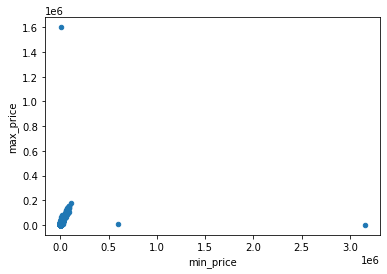

In [13]:
# lets plot max_price with min_price
data.plot(kind='scatter', x='min_price', y='max_price');

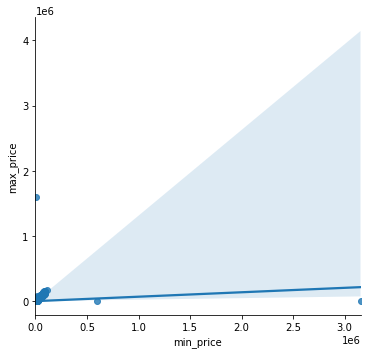

In [16]:
# we see some points which are outliers
# let's try to check if this will affect our model.
sns.lmplot(data=data, x='min_price', y='max_price');

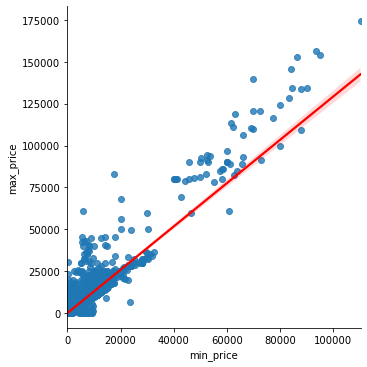

In [18]:
# we see that those outliers can affect the model by a lot, so lets drop them too
data = data[(data.min_price < 500000) & (data.max_price < 500000)]# removing all the values which are more than 500K
# lets try if this works
sns.lmplot(data=data, x='min_price', y='max_price', line_kws={'color': 'red'});

## This looks a lot better, let's save the data

In [20]:
data.to_csv('data/data_cmo_clean.csv', index=False)  # save the data

## Now let's move to the next step 